<a href="https://colab.research.google.com/github/majiddaeinejad/quera-ai-bootcamp-divar/blob/statistical_analysis/Question_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setup cell



In [25]:
!pip install arabic-reshaper python-bidi jdatetime utm --quiet

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import arabic_reshaper
from bidi.algorithm import get_display
import jdatetime

import geopandas as gpd
from shapely.geometry import Polygon
import folium
from branca.colormap import StepColormap


rcParams['font.family'] = 'DejaVu Sans'

def fa_label(text):
    return get_display(arabic_reshaper.reshape(text))

In [26]:


from google.colab import drive

drive.mount('/content/drive', force_remount=True)


file_path = '/content/drive/MyDrive/Colab Notebooks/Divar.csv'


df = pd.read_csv(file_path , encoding='utf-8')

Mounted at /content/drive


/tmp/ipython-input-3746982823.py:9: DtypeWarning: Columns (11,27,29,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path , encoding='utf-8')


ترند میانگین قیمت اجاره بر حسب ماه‌های قرار گرفتن آگهی‌ها رسم کنید.(دقت کنید که ماه‌ها باید به تاریخ شمسی و خوانا باشند.)



In [27]:
df = df[df['cat2_slug'] != 'real-estate-services'].copy()


ad_type_mapping = {
    'residential-sell': 'Sale',
    'residential-rent': 'Rent',
    'commercial-rent': 'Rent',
    'commercial-sell': 'Sale',
    'temporary-rent': 'Rent'
}
df['ad_type'] = df['cat2_slug'].map(ad_type_mapping)

print(df['ad_type'].value_counts())

ad_type
Sale    597569
Rent    383028
Name: count, dtype: int64


In [28]:
df = df[df['ad_type'] == 'Rent']

nan_count_rent = df['transformable_rent'].isna().sum()
nan_percentage_rent = (nan_count_rent / len(df)) * 100
nan_percentage_rent

np.float64(8.297043558173293)

In [29]:
df = df.dropna(subset=['transformable_rent'])

In [30]:
nan_count = df['transformable_rent'].isna().sum()
nan_percentage= (nan_count/ len(df)) * 100
nan_percentage


np.float64(0.0)

In [31]:
df['created_at_month'] = pd.to_datetime(df['created_at_month'])

In [35]:
def get_persian_month(date):
    jd = jdatetime.datetime.fromgregorian(datetime=date)
    months = ['فروردین', 'اردیبهشت', 'خرداد', 'تیر', 'مرداد', 'شهریور',
              'مهر', 'آبان', 'آذر', 'دی', 'بهمن', 'اسفند']
    return months[jd.month - 1]

df['persian_month'] = df['created_at_month'].apply(get_persian_month)
month_order = ['فروردین', 'اردیبهشت', 'خرداد', 'تیر', 'مرداد', 'شهریور',
               'مهر', 'آبان', 'آذر', 'دی', 'بهمن', 'اسفند']
df['persian_month'] = pd.Categorical(df['persian_month'],categories=month_order,ordered=True)

monthly_counts = df.groupby(['persian_month', 'ad_type']).size().unstack(fill_value=0)
monthly_counts

/tmp/ipython-input-2906238401.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = df.groupby(['persian_month', 'ad_type']).size().unstack(fill_value=0)


ad_type,Rent
persian_month,
فروردین,939
اردیبهشت,31127
خرداد,46822
تیر,51134
مرداد,52315
شهریور,46978
مهر,45884
آبان,39541
آذر,36016


/tmp/ipython-input-1880413470.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('persian_month')['transformable_rent']


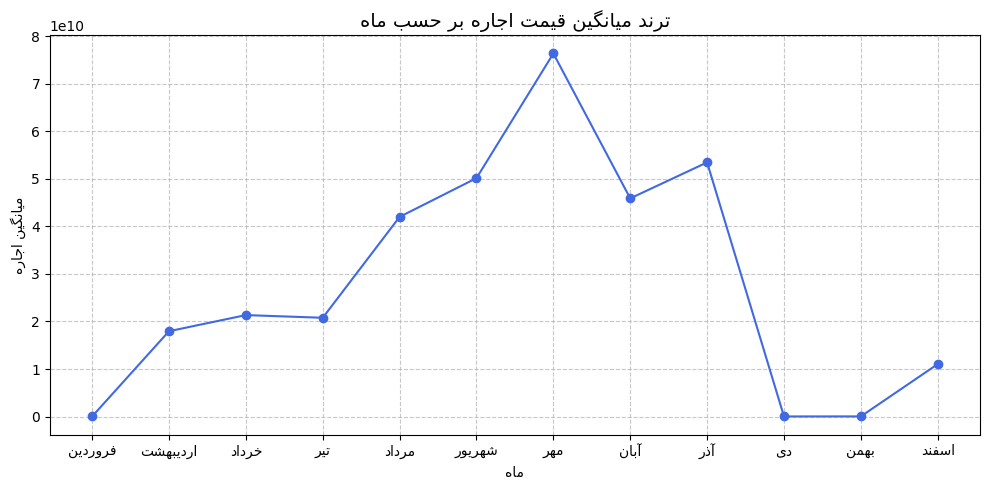

In [33]:
monthly_avg_rent = (
           df.groupby('persian_month')['transformable_rent']
           .mean()
           .reset_index()
)


plt.figure(figsize=(10, 5))
plt.plot(
    monthly_avg_rent['persian_month'],
    monthly_avg_rent['transformable_rent'],
    marker='o',
    color='royalblue'
)

plt.title(fa_label('ترند میانگین قیمت اجاره بر حسب ماه'), fontsize=14)
plt.xlabel(fa_label('ماه'))
plt.ylabel(fa_label('میانگین اجاره'))
plt.xticks(
    ticks=range(len(monthly_avg_rent)),
    labels=[fa_label(m) for m in monthly_avg_rent['persian_month']]
)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
